In [ ]:
using DataFrames, CSV, Plots, StatsPlots
#Change the name of the excel file
df = CSV.read("risk_aversion_results_O10T720.csv", DataFrame)

Row,δ,Ψ,objective,ζ_total,max_u,PV,Wind,Gas,Battery_P,Battery_E
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,0.1,5.66173e8,137.398,547.858,57.7617,136.92,35.7441,41.6425,118.472
2,0.8,0.1,4.53051e8,5.62702e5,5.68594e-6,57.7604,136.922,35.7434,41.6442,118.477
3,0.5,0.1,2.83367e8,562701.0,3.25988e-6,57.7586,136.926,35.7419,41.6484,118.484
4,0.2,0.1,1.13685e8,5.62702e5,7.3715e-7,57.7567,136.926,35.7391,41.6615,118.487
5,0.0,0.1,5.62722e5,5.62722e5,1.33273e-6,60.3161,135.917,34.4085,44.527,119.691


1. Objective Value vs. δ (for each Ψ)

Why: Shows how the central planner sacrifices expected profit to gain robustness (CVaR) as δ ↓.

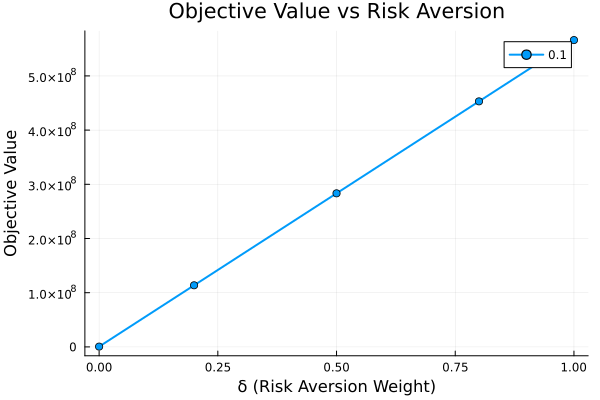

In [2]:
@df df plot(:δ, :objective,
    group = :Ψ,
    xlabel = "δ (Risk Aversion Weight)",
    ylabel = "Objective Value",
    title = "Objective Value vs Risk Aversion",
    legend = :topright,
    lw = 2,
    markershape = :circle
)

 2. ζ_total vs. δ (for each Ψ)
 
Why: Shows how the VaR (worst-case welfare) shifts under different δ — should become more conservative.

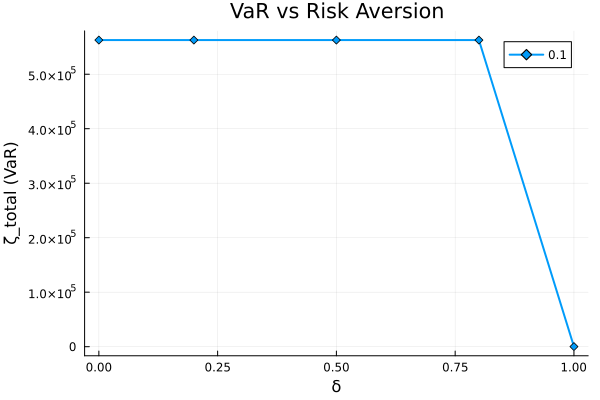

In [4]:
@df df plot(:δ, :ζ_total,
    group = :Ψ,
    xlabel = "δ",
    ylabel = "ζ_total (VaR)",
    title = "VaR vs Risk Aversion",
    legend = :topright,
    lw = 2,
    markershape = :diamond
)


3. max_u (worst-case shortfall) vs. δ

Why: See if any scenario dips below ζ_total — this helps confirm if CVaR is active.

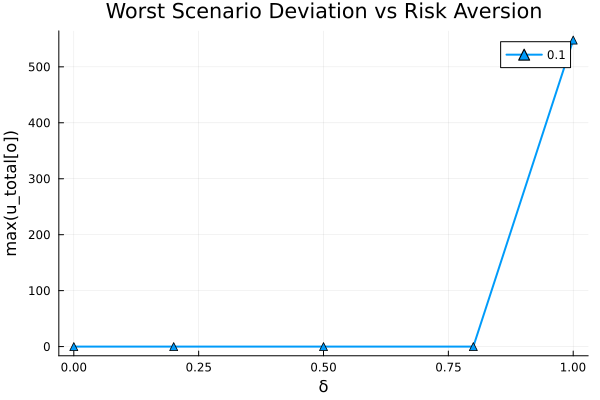

In [5]:
@df df plot(:δ, :max_u,
    group = :Ψ,
    xlabel = "δ",
    ylabel = "max(u_total[o])",
    title = "Worst Scenario Deviation vs Risk Aversion",
    legend = :topright,
    lw = 2,
    markershape = :utriangle
)


4. Investment by Technology vs. δ

Gas, Wind, PV, Storage — shows how the planner shifts the capacity mix to hedge risk.

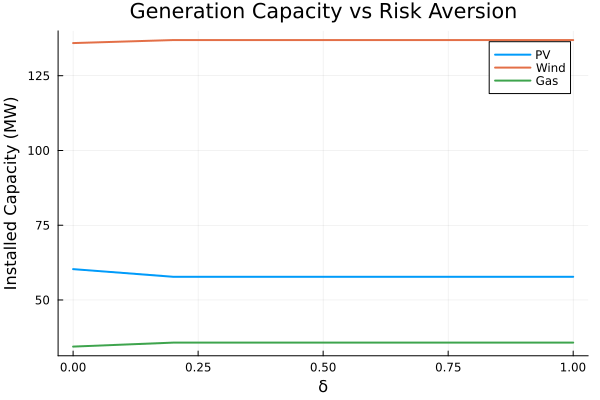

In [6]:
@df df plot(:δ, [:PV :Wind :Gas],
    group = :Ψ,
    xlabel = "δ",
    ylabel = "Installed Capacity (MW)",
    title = "Generation Capacity vs Risk Aversion",
    label = ["PV" "Wind" "Gas"],
    legend = :topright,
    lw = 2
)


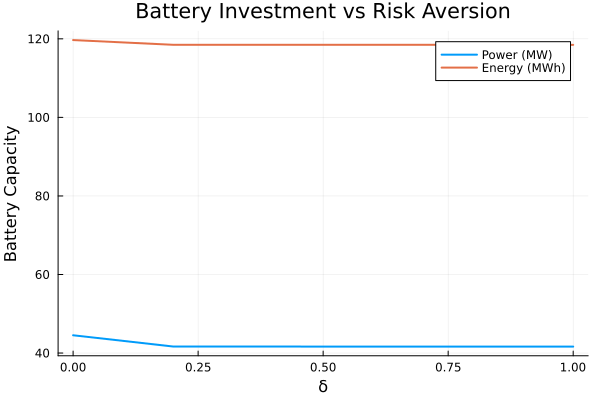

In [7]:
@df df plot(:δ, [:Battery_P :Battery_E],
    group = :Ψ,
    xlabel = "δ",
    ylabel = "Battery Capacity",
    title = "Battery Investment vs Risk Aversion",
    label = ["Power (MW)" "Energy (MWh)"],
    lw = 2,
    legend = :topright
)

5. Total Firm Capacity vs δ (Grouped by Ψ)

This will show how the model adds Gas + Battery_Power as δ ↓ to hedge against uncertain renewables.

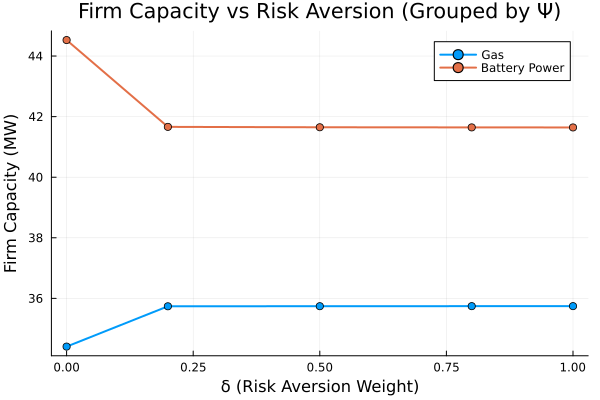

In [8]:
@df df plot(:δ,
    [:Gas :Battery_P],
    group = :Ψ,
    xlabel = "δ (Risk Aversion Weight)",
    ylabel = "Firm Capacity (MW)",
    title = "Firm Capacity vs Risk Aversion (Grouped by Ψ)",
    label = ["Gas" "Battery Power"],
    lw = 2,
    markershape = :circle,
    legend = :topright
)

6. Total Installed Capacity vs δ (Grouped by Ψ)

This will show a high-level view of whether the system becomes more robust (overbuilt) or more streamlined (leaner) as the planner becomes more risk-averse.

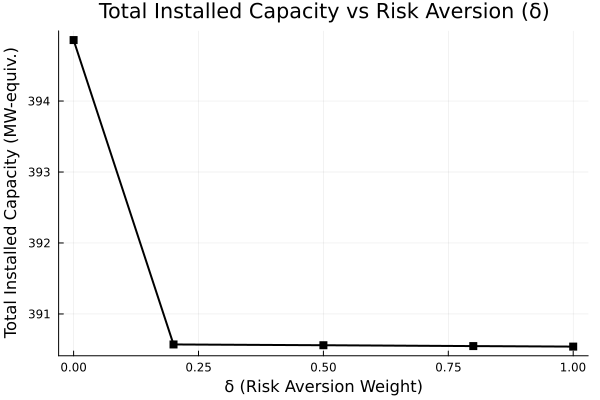

In [9]:
df.total_capacity = df.PV + df.Wind + df.Gas + df.Battery_P + df.Battery_E

@df df plot(:δ, :total_capacity,
    group = :Ψ,
    xlabel = "δ (Risk Aversion Weight)",
    ylabel = "Total Installed Capacity (MW-equiv.)",
    title = "Total Installed Capacity vs Risk Aversion (δ)",
    legend = false,
    lw = 2,
    markershape = :rect,
    markercolor = :black,
    linecolor = :black,
    grid = true
)
